In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install neattext

import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data = pd.read_csv("drive/MyDrive/data/train.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [ ]:
test_data = pd.read_csv("drive/MyDrive/data/test.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [ ]:
validation_data = pd.read_csv("drive/MyDrive/data/val.txt", header=None, sep=";", names=["Comment","Emotion"], encoding="utf-8")

In [ ]:
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (16000, 2)
Test :  (2000, 2)
Validation :  (2000, 2)


In [ ]:
train_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [ ]:
test_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [ ]:
validation_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [ ]:
train_data.head()

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
test_data.head()

,Comment,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
validation_data.head()

,Comment,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
train_data['length'] = [len(x) for x in train_data['Comment']]
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


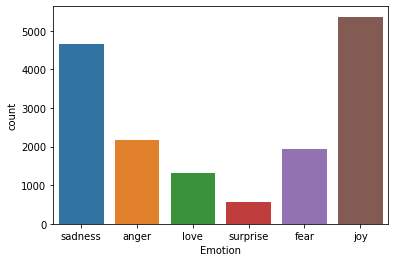

In [ ]:
sns.countplot(train_data['Emotion'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


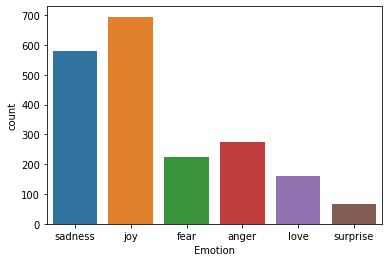

In [ ]:
sns.countplot(test_data['Emotion'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


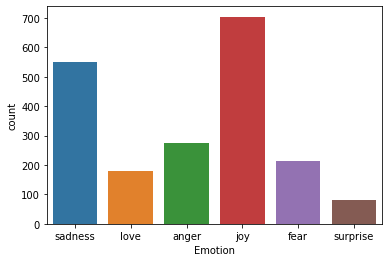

In [ ]:
sns.countplot(validation_data['Emotion'])

Exploration
* sentiment analysis
* text cleaning
* WordCloud

# sentiment analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment>0:
     print("positive")
  elif sentiment <0:
    print("negative")
  else:
    print("neutral")

In [ ]:
get_sentiment("I love donuts")

positive


In [ ]:
get_sentiment("I hate tomato")

negative


In [ ]:
get_sentiment("I might like to go")

neutral


# text cleaning

In [ ]:
# cleaning train.txt

train_data['Clean_Text'] = train_data['Comment'].apply(nfx.remove_stopwords)
train_data['Clean_Text'] = train_data['Comment'].apply(nfx.remove_punctuations)
train_data['Clean_Text'] = train_data['Comment'].apply(nfx.remove_userhandles)
train_data[['Comment','Clean_Text'] ]

,Comment,Clean_Text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy
...,...,...
15995,i just had a very brief time in the beanbag an...,i just had a very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...,i am now turning and i feel pathetic that i am...
15997,i feel strong and good overall,i feel strong and good overall
15998,i feel like this was such a rude comment and i...,i feel like this was such a rude comment and i...


In [ ]:
emotions_list = train_data['Emotion'].unique().tolist()

In [ ]:
emotions_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [ ]:
from wordcloud import WordCloud

In [ ]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");

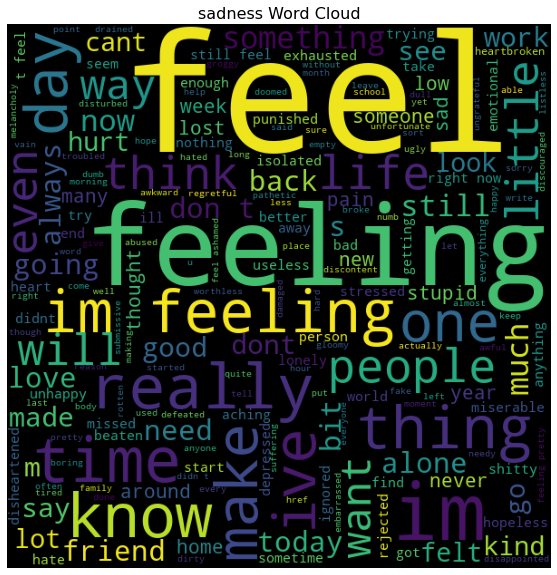

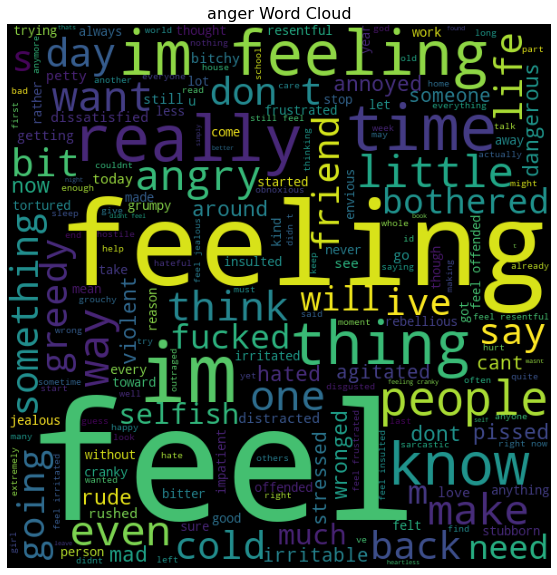

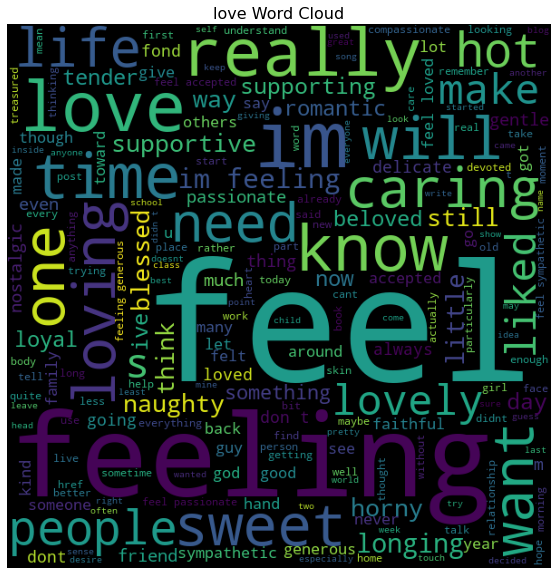

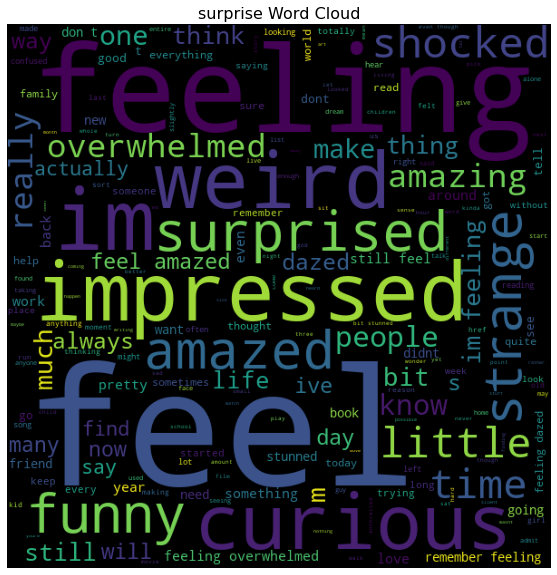

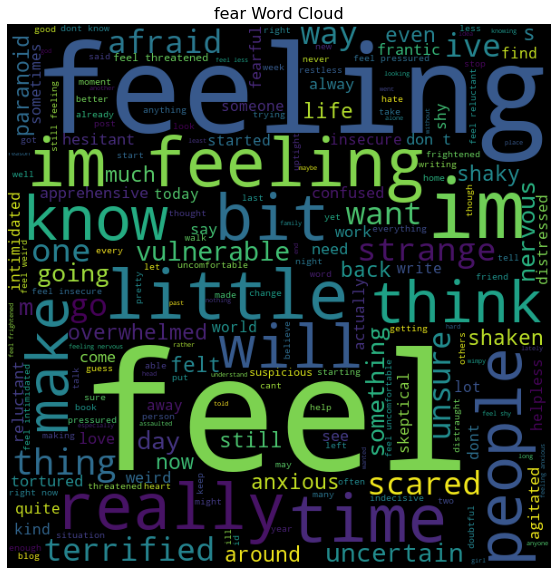

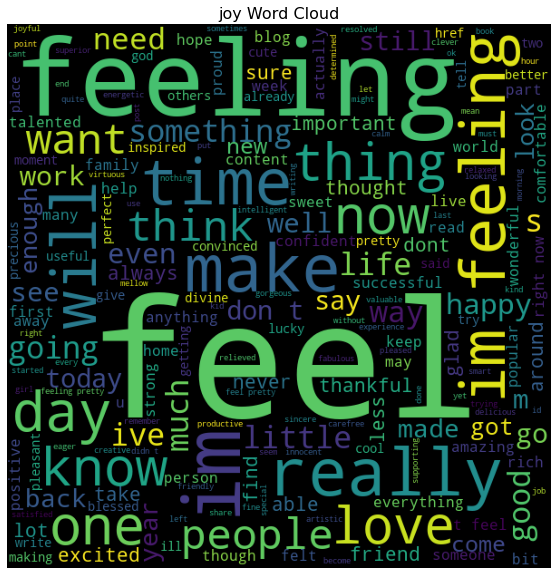

In [ ]:
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

# preprocessing

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])
test_data['Emotion'] = lb.fit_transform(test_data['Emotion'])
validation_data['Emotion'] = lb.fit_transform(validation_data['Emotion'])

In [ ]:
train_data.head(10)

,Comment,Emotion,length,Clean_Text
0,i didnt feel humiliated,4,23,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,4,108,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,0,20,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,4,65,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,5,122,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,1,73,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,2,98,i have been with petronas for years i feel tha...
9,i feel romantic too,3,19,i feel romantic too


In [ ]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
max_len=train_data['length'].max()
max_len

300

In [ ]:
tokenizer = Tokenizer()
#tokenizer.fit_on_texts(pd.concat(X_train, axis=0)).values

In [ ]:
vocabSize = 11000

Removing unrelevent chars, Stemming and padding

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
def text_cleaning(df, column):
   
    stemmer = PorterStemmer()
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,padding='pre')
    print(pad.shape)
    return pad

In [ ]:
x_train = text_cleaning(train_data, "Comment")
x_test = text_cleaning(test_data, "Comment")
x_val = text_cleaning(validation_data, "Comment")

(16000, 35)
(2000, 31)
(2000, 31)


In [ ]:
print(x_train.shape, y_train.shape)

(16000, 35) (16000, 6)


In [ ]:
print(x_val.shape, y_val.shape)

(2000, 31) (2000, 6)


In [ ]:
y_train = train_data["Emotion"]
y_test = test_data["Emotion"]
y_val = validation_data["Emotion"]

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Model Building

In [ ]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabSize,output_dim=150,input_length=35))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 150)           1650000   
                                                                 
 dropout_9 (Dropout)         (None, 35, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               142848    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                

In [ ]:
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=64,
                 validation_data=(x_val,y_val), verbose=1, callbacks=[callback])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: ignored

In [ ]:
model.evaluate(x_val,y_val,verbose=1)

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

In [ ]:
accuracy = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b', label='Training accuracy')
plt.plot(epochs,val_acc,'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'b', label='Training loss')
plt.plot(epochs,val_loss,'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()